In [9]:
from datetime import date, timedelta
import gc
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load actual data

In [11]:
file_path = '../derived_datasets/'

In [12]:
df_true = pd.read_csv(file_path + 'df_true.csv',index_col=['store_nbr', 'item_nbr'])

In [13]:
df_true.columns = pd.to_datetime(df_true.columns)

In [14]:
df_true.head()

2017-05-01  2017-05-02  2017-05-03  2017-05-04  \
store_nbr item_nbr                                                   
1         96995       0.000000    0.000000    0.000000    0.000000   
          99197       0.000000    0.000000    0.000000    0.000000   
          103520      0.693147    1.791759    2.302585    1.609438   
          103665      0.000000    0.693147    1.098612    1.609438   
          105574      1.609438    1.098612    2.397895    2.302585   

                    2017-05-05  2017-05-06  2017-05-07  2017-05-08  \
store_nbr item_nbr                                                   
1         96995       0.000000    0.000000    0.000000    0.693147   
          99197       0.000000    0.000000    0.000000    0.000000   
          103520      0.693147    0.000000    0.693147    1.098612   
          103665      0.693147    1.791759    0.000000    1.098612   
          105574      2.197225    1.609438    1.386294    2.772589   

                    2017-05-09  2017-05-10     ...      2017-08-06  \
store_nbr item_nbr                             ...                   
1         96995       0.693147    0.000000     ...        1.098612   
          99197       0.000000    0.693147     ...        0.000000   
          103520      0.693147    0.000000     ...        0.000000   
          103665      1.609438    0.000000     ...        0.693147   
          105574      2.079442    2.564949     ...        0.000000   

                    2017-08-07  2017-08-08  2017-08-09  2017-08-10  \
store_nbr item_nbr                                                   
1         96995       1.098612    0.000000    0.000000    0.693147   
          99197       1.098612    0.000000    1.098612    0.000000   
          103520      0.000000    1.386294    0.000000    1.386294   
          103665      1.098612    0.000000    2.079442    2.302585   
          105574      1.791759    2.079442    1.945910    2.397895   

                    2017-08-11  2017-08-12  2017-08-13  2017-08-14  2017-08-15  
store_nbr item_nbr                                                              
1         96995       0.000000    0.000000    0.000000    0.000000    0.000000  
          99197       0.000000    0.000000    0.000000    0.000000    0.000000  
          103520      0.693147    0.693147    0.693147    0.000000    0.000000  
          103665      1.098612    0.000000    0.000000    0.693147    0.693147  
          105574      1.791759    1.791759    0.000000    1.386294    1.609438  

[5 rows x 107 columns]

In [15]:
# from 2017-05-01 to 2017-08-15
df_true.shape

(167515, 107)

### Load LGBM predicted data

In [16]:
#lgbm best model
file_name = "lgbm_test_pred_model_10.csv"

df_pred_lgbm = pd.read_csv(file_path + file_name, parse_dates=True, index_col = ['store_nbr','item_nbr'])

In [17]:
df_pred_lgbm.columns = pd.to_datetime(df_pred_lgbm.columns)

In [18]:
df_pred_lgbm.head()

2017-08-01  2017-08-02  2017-08-03  2017-08-04  \
store_nbr item_nbr                                                   
1         96995       0.240455    0.237259    0.226328    0.264515   
          99197       0.303040    0.351706    0.343616    0.427747   
          103520      0.853022    0.922768    1.001413    0.975718   
          103665      0.976243    1.052722    0.942085    1.232298   
          105574      1.869732    1.991140    1.824918    1.957662   

                    2017-08-05  2017-08-06  2017-08-07  2017-08-08  \
store_nbr item_nbr                                                   
1         96995       0.265930    0.241420    0.220975    0.192424   
          99197       0.446318    0.255873    0.372386    0.355816   
          103520      0.889555    0.351809    0.831650    0.788829   
          103665      1.255253    0.660602    0.940600    0.952624   
          105574      1.701903    0.863916    1.905561    1.857626   

                    2017-08-09  2017-08-10  2017-08-11  2017-08-12  \
store_nbr item_nbr                                                   
1         96995       0.223262    0.191299    0.227853    0.266747   
          99197       0.379891    0.356401    0.429322    0.454564   
          103520      0.941242    0.975568    0.963765    0.913899   
          103665      1.009790    0.921222    1.226809    1.252477   
          105574      1.983967    1.754232    1.914827    1.679225   

                    2017-08-13  2017-08-14  2017-08-15  
store_nbr item_nbr                                      
1         96995       0.212561    0.207561    0.199303  
          99197       0.283007    0.357202    0.366089  
          103520      0.391249    0.807852    0.820022  
          103665      0.710134    0.936163    0.923840  
          105574      0.948411    1.836561    1.827707

### Load NN predicted Data

In [19]:
#lgbm best model
file_name = "nn_test_pred_model_3.csv"

df_pred_nn = pd.read_csv(file_path + file_name, parse_dates=True, index_col = ['store_nbr','item_nbr'])

In [20]:
df_pred_nn.columns = pd.to_datetime(df_pred_nn.columns)

In [21]:
df_pred_nn.head()

2017-08-01  2017-08-02  2017-08-03  2017-08-04  \
store_nbr item_nbr                                                   
1         96995       0.230709    0.299386    0.239580    0.233425   
          99197       0.351892    0.236675    0.323005    0.044529   
          103520      0.752438    0.911705    0.962322    0.852365   
          103665      0.793794    1.039253    1.005299    1.297400   
          105574      1.708603    1.865813    1.520457    1.908440   

                    2017-08-05  2017-08-06  2017-08-07  2017-08-08  \
store_nbr item_nbr                                                   
1         96995       0.417929    0.390753    0.151863    0.259535   
          99197       0.571958    0.332180    0.373906    0.522508   
          103520      0.732969    0.349866    0.743705    0.601311   
          103665      1.128310    0.822319    0.878675    0.916993   
          105574      1.626304    0.633825    1.789535    1.849701   

                    2017-08-09  2017-08-10  2017-08-11  2017-08-12  \
store_nbr item_nbr                                                   
1         96995       0.264127    0.278572    0.300965    0.307366   
          99197       0.452686    0.254324    0.297778    0.312148   
          103520      0.847567    0.883760    0.864775    1.043011   
          103665      0.874167    0.978365    1.137532    1.400525   
          105574      1.855560    1.697001    2.018984    1.707390   

                    2017-08-13  2017-08-14  2017-08-15  
store_nbr item_nbr                                      
1         96995       0.420552    0.103404    0.368553  
          99197       0.229701    0.318012    0.604405  
          103520      0.546299    0.803296    0.634932  
          103665      0.818697    0.942197    0.650621  
          105574      1.112395    1.934652    1.785560

In [22]:
df_pred_nn.shape

(167515, 15)

### load items file get items weight

In [23]:
items = pd.read_csv('../input/items.csv', index_col = 'item_nbr')

# Create for graphing use
item_family_dict = {k:v for k, v in items.family.iteritems()}

In [24]:
items = items.reindex(df_true.index.get_level_values(1))

In [25]:
weights = (items.perishable * 0.25 + 1).values
weights = weights.reshape(weights.shape[0],1)
weights.shape

(167515, 1)

### Calculate NWRMSLE for LGBM test predictions

In [48]:
df_error_temp = np.power(df_true[pd.date_range('2017-08-01','2017-08-15')] - df_pred_lgbm,2)
df_error_temp = df_error_temp.values * weights
print(f'LGBM test NWRMSLE: {np.sqrt(df_error_temp.sum().sum()/weights.sum()/15)}')

del df_error_temp; gc.collect()

LGBM test NWRMSLE: 0.5982621721704929


16

### Calculate NWRMSLE for NN test predictions (double check)

In [50]:
df_error_temp = np.power(df_true[pd.date_range('2017-08-01','2017-08-15')] - df_pred_nn,2)
df_error_temp = df_error_temp.values * weights
print(f'LGBM test NWRMSLE: {np.sqrt(df_error_temp.sum().sum()/weights.sum()/15)}')

del df_error_temp; gc.collect()

LGBM test NWRMSLE: 0.6223143411636983


8

### Calculate MAE for LGBM and NN Models

In [138]:
df_mae_lgbm = np.abs(np.expm1(df_true[pd.date_range('2017-08-01','2017-08-15')]) - np.expm1(df_pred_lgbm)).mean(axis=1)
df_mae_lgbm = pd.DataFrame(df_mae_lgbm, columns = ['mae'])
df_mae_lgbm.reset_index(-1,inplace=True)
df_mae_lgbm['family'] = df_mae_lgbm['item_nbr'].apply(lambda x: item_family_dict[x])
df_mae_lgbm.reset_index(inplace=True)
df_mae_lgbm.set_index(['store_nbr', 'item_nbr'],inplace=True)
df_mae_lgbm = df_mae_lgbm.sort_values(by = 'mae', ascending=False)

In [143]:
df_mae_nn = np.abs(np.expm1(df_true[pd.date_range('2017-08-01','2017-08-15')]) - np.expm1(df_pred_nn)).mean(axis=1)
df_mae_nn = pd.DataFrame(df_mae_nn, columns = ['mae'])
df_mae_nn.reset_index(-1,inplace=True)
df_mae_nn['family'] = df_mae_nn['item_nbr'].apply(lambda x: item_family_dict[x])
df_mae_nn.reset_index(inplace=True)
df_mae_nn.set_index(['store_nbr', 'item_nbr'],inplace=True)
df_mae_nn = df_mae_nn.sort_values(by = 'mae', ascending=False)

In [139]:
df_mae_lgbm.head()

mae     family
store_nbr item_nbr                       
54        2013931   882.191280  BEVERAGES
40        2060793   792.241483  BEVERAGES
          2061214   773.058111  BEVERAGES
31        2013931   562.778418  BEVERAGES
20        841842    506.235593  GROCERY I

In [145]:
df_mae_nn.head()

mae     family
store_nbr item_nbr                       
54        2013931   885.632329  BEVERAGES
40        2060793   758.405851  BEVERAGES
          2061214   732.722686  BEVERAGES
31        2013931   545.863840  BEVERAGES
40        841842    496.022836  GROCERY I

In [140]:
# PRODUCE with highest MAE for LGBM model 
df_mae_lgbm[df_mae_lgbm.family == 'PRODUCE'].iloc[[0]]

,,mae,family
store_nbr,item_nbr,,
44,1503844,283.665194,PRODUCE


In [141]:
# BEVERAGES with highest MAE  for LGBM model
df_mae_lgbm[df_mae_lgbm.family == 'BEVERAGES'].iloc[[0]]

,,mae,family
store_nbr,item_nbr,,
54,2013931,882.19128,BEVERAGES


In [142]:
# GROCERY I with highest MAE for LGBM model
df_mae_lgbm[df_mae_lgbm.family == 'GROCERY I'].iloc[[0]]

,,mae,family
store_nbr,item_nbr,,
20,841842,506.235593,GROCERY I


### Prediction error for LGBM & NN models 
#### (positive means overprediction, negative means underprediction)

In [92]:
df_error_lgbm = np.expm1(df_pred_lgbm) - np.expm1(df_true[pd.date_range('2017-08-01','2017-08-15')])

In [148]:
df_error_lgbm.head()

2017-08-01  2017-08-02  2017-08-03  2017-08-04  \
store_nbr item_nbr                                                   
1         96995       0.271828   -0.732231   -1.746013    0.302798   
          99197       0.353969    0.421490    0.410038    0.533799   
          103520     -1.653271    0.516245   -0.277873   -1.346928   
          103665     -2.345535   -0.134560   -0.434675   -5.570900   
          105574     -2.513440   -1.676124   -0.797716    1.082749   

                    2017-08-05  2017-08-06  2017-08-07  2017-08-08  \
store_nbr item_nbr                                                   
1         96995       0.304644   -1.726945   -1.752708    0.212184   
          99197      -0.437452    0.291588   -1.548808    0.427346   
          103520      1.434046    0.421638    1.297106   -1.799182   
          103665     -0.491276   -0.064043   -0.438483    1.592503   
          105574     -2.515624    1.372434    0.723175   -1.591492   

                    2017-08-09  2017-08-10  2017-08-11  2017-08-12  \
store_nbr item_nbr                                                   
1         96995       0.250148   -0.789179    0.255900    0.305710   
          99197      -1.537875    0.428180    0.536216    0.575486   
          103520      1.563162   -1.347326    0.621549    0.494028   
          103665     -5.254975   -7.487641    0.410331    2.498998   
          105574      0.271533   -5.220992    0.785765   -0.638600   

                    2017-08-13  2017-08-14  2017-08-15  
store_nbr item_nbr                                      
1         96995       0.236841    0.230673    0.220552  
          99197       0.327115    0.429325    0.442084  
          103520     -0.521173    1.243084    1.270550  
          103665      1.034264    0.550177    0.518945  
          105574      1.581603    2.274921    1.219609

In [91]:
df_error_nn = np.expm1(df_pred_nn) - np.expm1(df_true[pd.date_range('2017-08-01','2017-08-15')])

### Plot sales forecasting for selected items

In [38]:
# Create plot function
def item_prediction_plot(store_nbr, item_nbr, fig_number = None):
    store_nbr =store_nbr
    item_nbr = item_nbr

    temp_dict = {'Actual': np.expm1(df_true.loc[(store_nbr,item_nbr)]),
                 'LGBM': np.expm1(df_pred_lgbm.loc[(store_nbr,item_nbr)]),
                 'NN': np.expm1(df_pred_nn.loc[(store_nbr,item_nbr)])}

    temp_df = pd.DataFrame(temp_dict)

    temp_df['Actual'].plot(color='black')
    temp_df['LGBM'].plot(color='royalblue')
    temp_df['NN'].plot(color='orange')

    plt.legend()
    plt.ylabel('Unit Sales')
    if fig_number == None:
        plt.title(f'Store #{store_nbr} | Item #{item_nbr} | Family: {item_family_dict[item_nbr]}')
    else:
        plt.title(f'{fig_number} Store #{store_nbr} | Item #{item_nbr} | Family: {item_family_dict[item_nbr]}')

In [93]:
out_path = '../final_report/figures/'

In [97]:
store_item_list = [(44,314384),(45, 1004551),(54, 2013931),(22, 841842)]
fig_number_list = list('abcd')

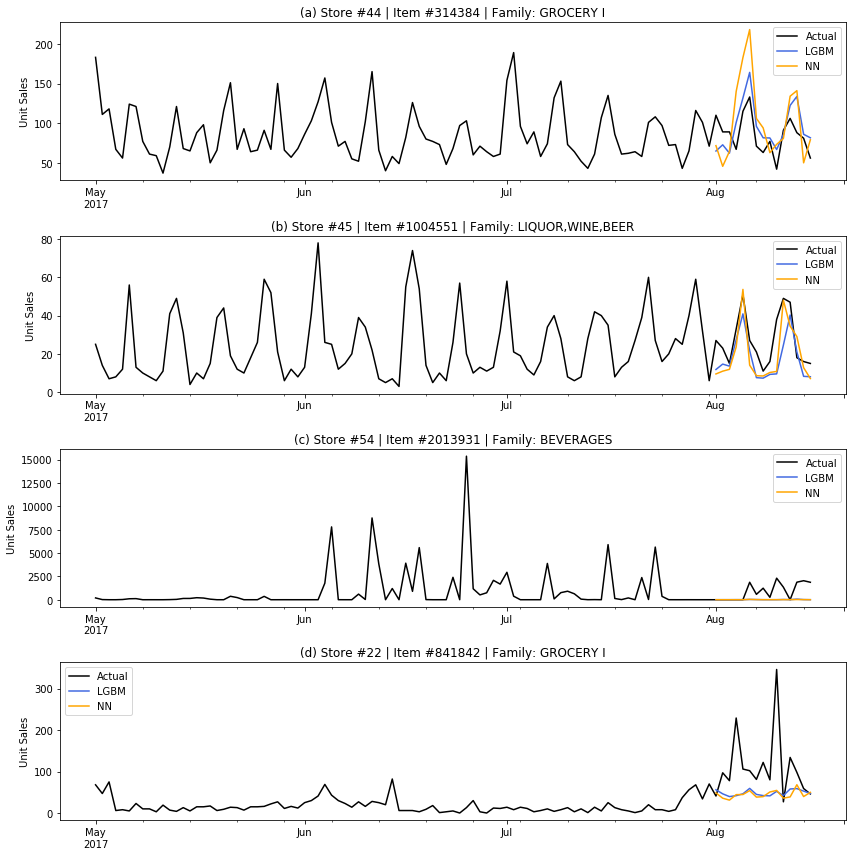

In [112]:
plt.figure(figsize=(12,12))
for i, j in enumerate(zip(store_item_list, fig_number_list),1):
    plt.subplot(4,1,i)
    item_prediction_plot(j[0][0], j[0][1], f'({j[1]})')
plt.tight_layout()
plt.savefig(out_path + 'items_pred_sales.png')


In [117]:
df_mae_lgbm.head()

,item_nbr,mae,family
store_nbr,,,
54,2013931,882.191280,BEVERAGES
40,2060793,792.241483,BEVERAGES
40,2061214,773.058111,BEVERAGES
31,2013931,562.778418,BEVERAGES
20,841842,506.235593,GROCERY I


In [113]:
store_item_list

[(44, 314384), (45, 1004551), (54, 2013931), (22, 841842)]

In [146]:
for store_nbr, item_nbr in store_item_list:  
    print(store_nbr, item_nbr, df_mae_lgbm.loc[store_nbr].loc[item_nbr]['mae'])

44 314384 22.691481750583883
45 1004551 9.789402058625715
54 2013931 882.1912802001448
22 841842 65.320614442222


In [147]:
for store_nbr, item_nbr in store_item_list:  
    print(store_nbr, item_nbr, df_mae_nn.loc[store_nbr].loc[item_nbr]['mae'])

44 314384 39.27022583858773
45 1004551 9.397773301845438
54 2013931 885.6323285316412
22 841842 67.49453582509354


In [149]:
for store_nbr, item_nbr in store_item_list:  
    print(store_nbr, item_nbr, df_error_lgbm.loc[store_nbr].loc[item_nbr].max(), df_error_lgbm.loc[store_nbr].loc[item_nbr].min())

44 314384 45.69869267654376 -45.12594084407543
45 1004551 2.99855104143737 -28.443991578293886
54 2013931 5.704124265313753 -2307.503708861796
22 841842 15.053601598830262 -293.7919793423211


In [150]:
for store_nbr, item_nbr in store_item_list:  
    print(store_nbr, item_nbr, df_error_nn.loc[store_nbr].loc[item_nbr].max(), df_error_nn.loc[store_nbr].loc[item_nbr].min())

44 314384 85.02831200009564 -43.42133051336668
45 1004551 11.05590657793196 -27.164304590072067
54 2013931 8.173007461986108 -2303.4358088090808
22 841842 8.885134101700633 -291.49626032577083


### Feature Importance

In [154]:
feature_importance = pd.read_csv(file_path + 'lgbm_feature_importance_model_10.csv', index_col = [0])

In [155]:
feature_importance.head()

,2017-08-01,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15
promo_7_2017,10957.473703,8305.526307,6969.641882,4157.829033,5284.911604,2450.394011,3434.881249,3992.413832,1631.753901,2698.620080,1654.136924,979.365124,1070.548905,829.513289,789.203192
promo_14_2017,3165.927708,5211.479719,12837.137056,7038.337335,6366.576076,3957.843390,6677.481629,8752.307484,5997.474637,3183.866021,3572.597314,2830.796539,2798.701915,2046.579503,3009.722317
promo_30_2017,6600.248784,9419.263841,8954.250712,11891.898312,9366.987423,12693.674017,11850.285388,11781.735706,15478.282425,12954.910084,16947.587667,17410.365182,22331.706520,18726.696568,16300.475110
promo_3_2017_aft,3427.403560,3686.227166,27717.404674,42436.968797,5605.283665,7171.872671,3293.343008,3879.375785,2877.052521,1866.821472,1240.662886,1523.006091,1150.098080,1152.732296,1055.730332
promo_7_2017_aft,4747.993348,8404.005875,21010.595376,54148.935940,58425.491038,67618.774292,61751.914222,51722.048054,13623.404189,3688.064917,2845.210586,3769.068008,3490.352198,2079.139871,2691.662467


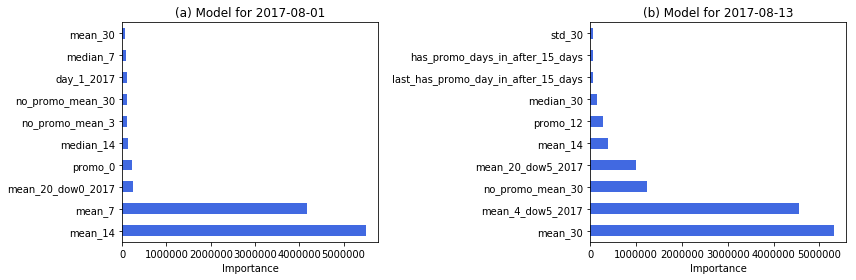

In [176]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df_temp = feature_importance['2017-08-01'].sort_values(ascending=False)[:10]
df_temp.plot.barh(color='royalblue')
plt.xlabel('Importance')
plt.title('(a) Model for 2017-08-01')
plt.subplot(1,2,2)
df_temp = feature_importance['2017-08-13'].sort_values(ascending=False)[:10]
df_temp.plot.barh(color='royalblue')
plt.xlabel('Importance')
plt.title('(b) Model for 2017-08-13')
plt.tight_layout()
plt.savefig(out_path + 'feature_importance.png');

## Presentation graphs

In [ ]:
store_item_list = [(44,314384),(45, 1004551),(54, 2013931),(22, 841842)]

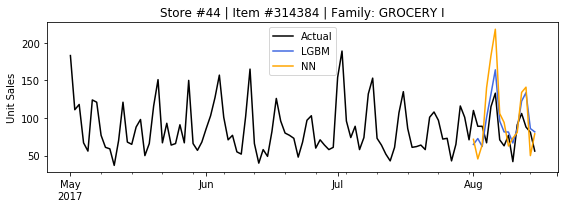

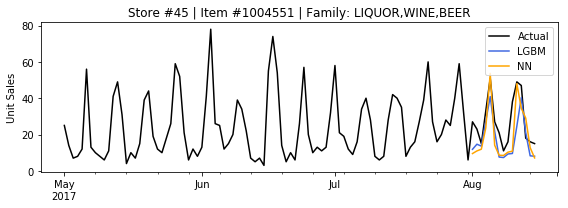

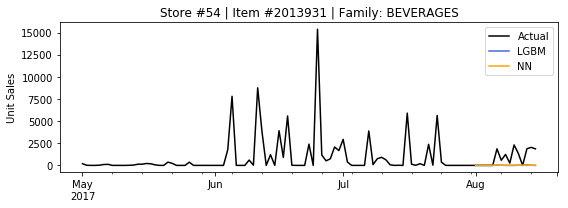

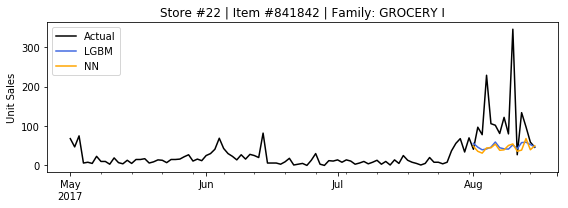

In [178]:
for s, i in store_item_list:
    plt.figure(figsize=(8,3))
    item_prediction_plot(s, i)
    plt.tight_layout()
    plt.savefig(f'../presentation/{s}_{i}_pred.png')